<a href="https://colab.research.google.com/github/rufoabrahamguyo/Machine-learning-codes/blob/main/covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries loaded successfully.
Dataset 'coronavirusdataset.csv' loaded successfully.

--- Initial Data Exploration ---
Dataset shape: (7294, 45) (rows, columns)

First 5 rows of the dataset:
   batch_date                     test_name swab_type covid19_test_results  \
0  2020-10-20               SARS-CoV-2, NAA     Nasal             Negative   
1  2020-10-20  COVID-19 PCR External Result     Nasal             Negative   
2  2020-10-20       Rapid COVID-19 PCR Test     Nasal             Negative   
3  2020-10-20       Rapid COVID-19 PCR Test     Nasal             Negative   
4  2020-10-20       Rapid COVID-19 PCR Test     Nasal             Negative   

   age  high_risk_exposure_occupation high_risk_interactions  diabetes    chd  \
0   39                          False                    NaN     False  False   
1   56                          False                    NaN     False  False   
2   35                          False                    NaN     False  False   
3   37          

/tmp/ipython-input-1-1970111308.py:84: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(median_val, inplace=True)
/tmp/ipython-input-1-1970111308.py:93: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Random Forest training complete.
Training Gradient Boosting Classifier...
Gradient Boosting training complete.

--- Model Evaluation ---

--- Random Forest Performance ---
Accuracy: 0.9922

Classification Report:
               precision    recall  f1-score   support

    Negative       0.99      1.00      1.00       382
    Positive       0.00      0.00      0.00         3

    accuracy                           0.99       385
   macro avg       0.50      0.50      0.50       385
weighted avg       0.98      0.99      0.99       385

ROC AUC: 0.5497


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


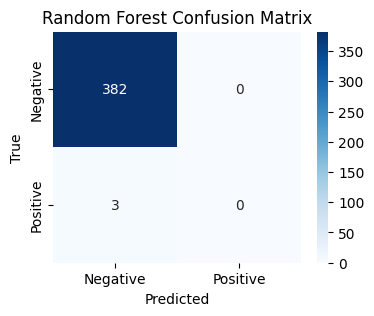


--- Gradient Boosting Performance ---
Accuracy: 0.9896

Classification Report:
               precision    recall  f1-score   support

    Negative       0.99      1.00      0.99       382
    Positive       0.00      0.00      0.00         3

    accuracy                           0.99       385
   macro avg       0.50      0.50      0.50       385
weighted avg       0.98      0.99      0.99       385

ROC AUC: 0.5515


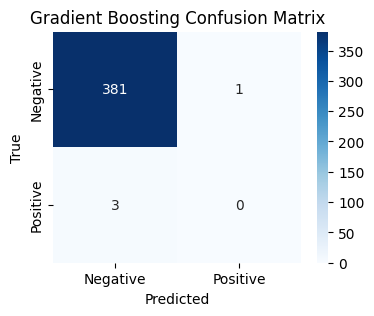

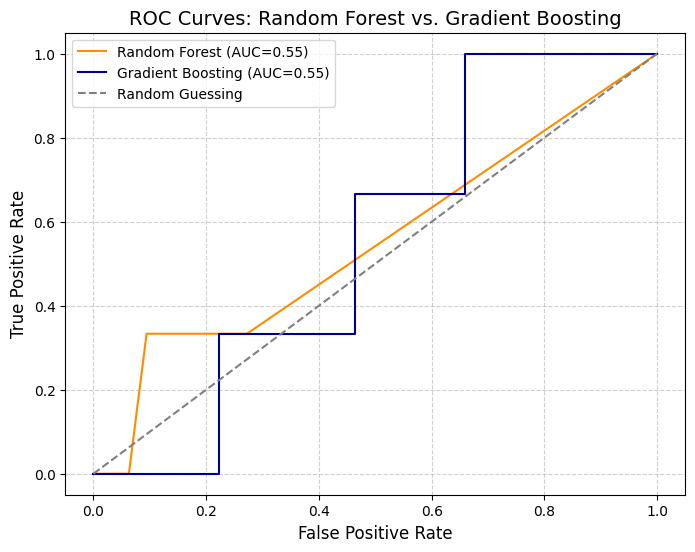


ROC Curves plotted for comparison.

--- Feature Importance Analysis ---


/tmp/ipython-input-1-1970111308.py:235: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=imp.values, y=imp.index, palette='viridis')


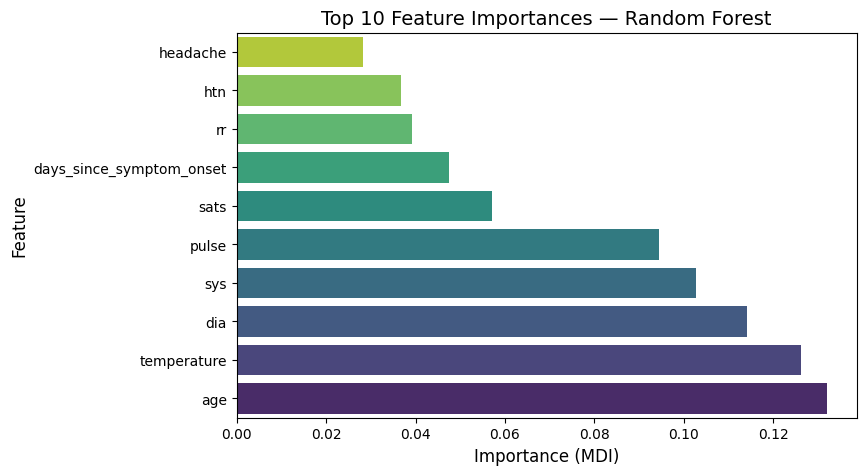

Top 10 features for Random Forest:
age                         0.132038
temperature                 0.126113
dia                         0.114009
sys                         0.102605
pulse                       0.094493
sats                        0.057008
days_since_symptom_onset    0.047409
rr                          0.039266
htn                         0.036751
headache                    0.028356
dtype: float64



/tmp/ipython-input-1-1970111308.py:235: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=imp.values, y=imp.index, palette='viridis')


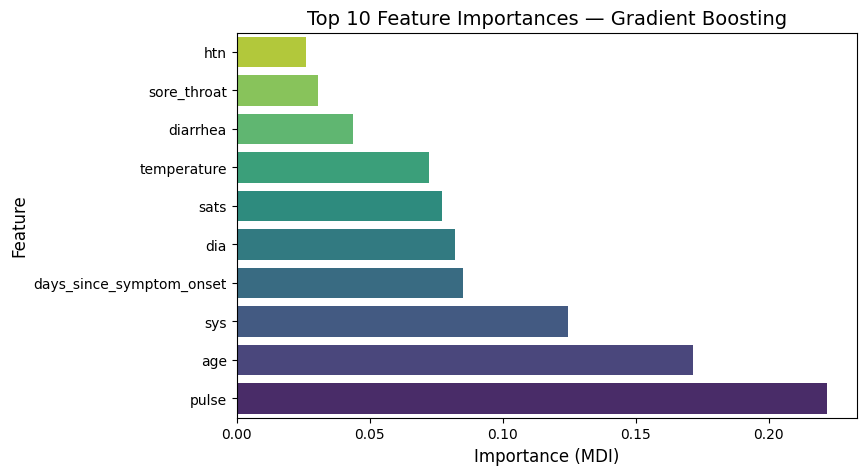

Top 10 features for Gradient Boosting:
pulse                       0.221923
age                         0.171365
sys                         0.124670
days_since_symptom_onset    0.085074
dia                         0.082148
sats                        0.077227
temperature                 0.072201
diarrhea                    0.043747
sore_throat                 0.030418
htn                         0.026165
dtype: float64


--- Visualizing a Single Decision Tree from Random Forest ---


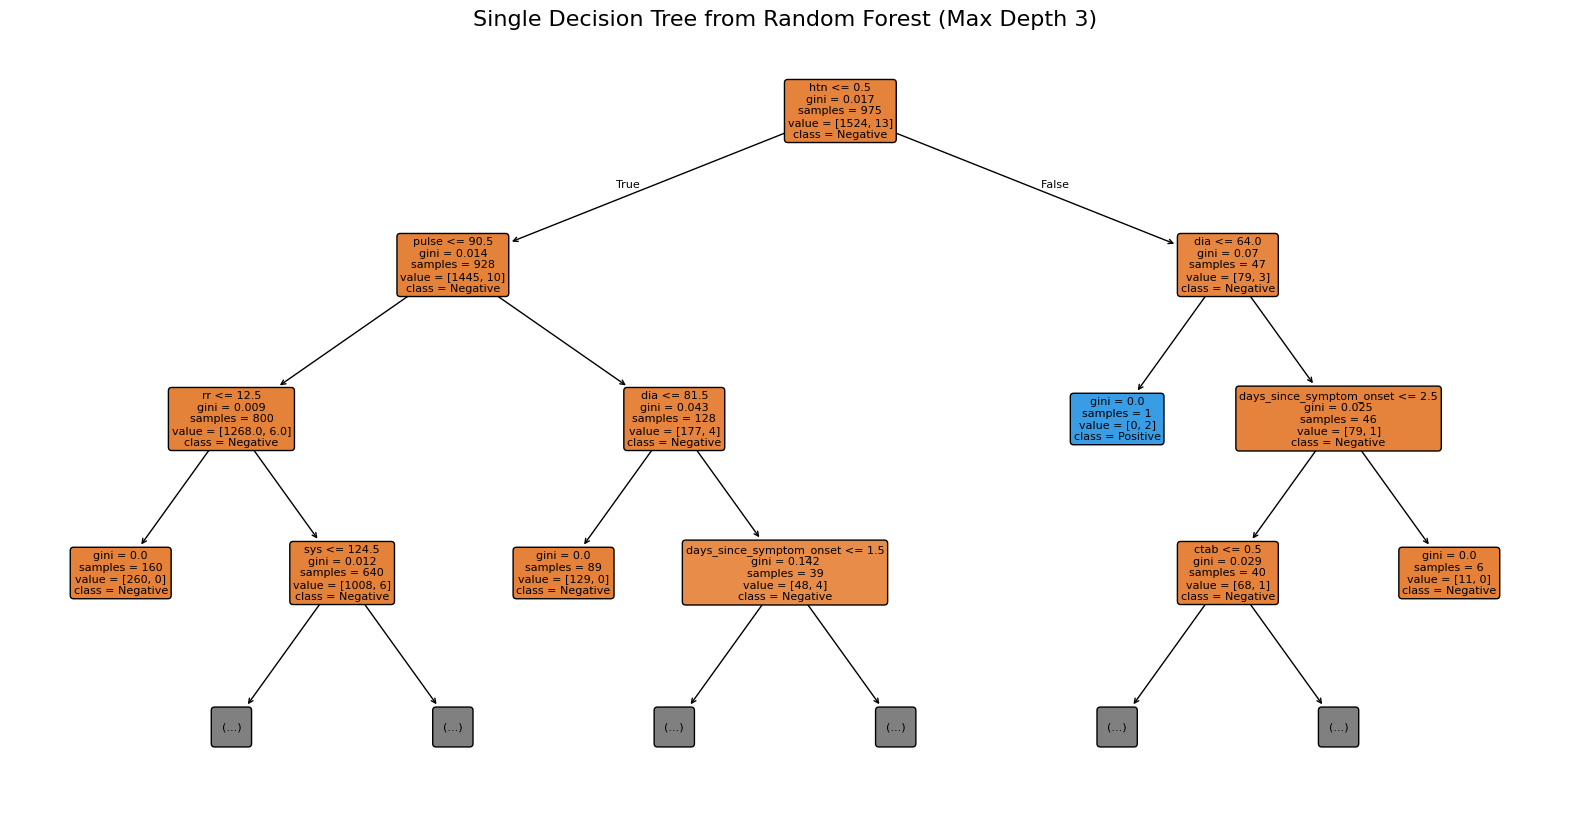

Single decision tree from Random Forest (first estimator) plotted.
Note: For larger trees, limiting max_depth is crucial for readability.

--- Analysis Complete ---
All required models trained, evaluated, and visualizations generated.


In [1]:
# COVID-19 Risk Classification: Final Code addressing all requirements

# 0. — Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_curve,
    auc,
    confusion_matrix
)
from sklearn.tree import plot_tree # Import for visualizing a single tree

# Ensure plots are displayed within the environment (e.g., Jupyter Notebook)
# %matplotlib inline # Uncomment if running in Jupyter Notebook

print("Libraries loaded successfully.")

# 1. — Load the data
try:
    df = pd.read_csv('coronavirusdataset.csv')
    print("Dataset 'coronavirusdataset.csv' loaded successfully.")
except FileNotFoundError:
    print("Error: 'coronavirusdataset.csv' not found. Please ensure the file is in the correct directory.")
    exit() # Exit if data not found

# 2. — Initial Data Exploration
# Markdown Explanation: "Before proceeding with any preprocessing, it's crucial to understand the
# basic structure and content of our dataset. This initial exploration helps identify
# the number of rows and columns, and provides insight into the distribution of our
# target variable."
print("\n--- Initial Data Exploration ---")
print(f"Dataset shape: {df.shape} (rows, columns)")
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nDataset Info (data types and non-null counts):")
df.info()
print("\nTarget variable 'covid19_test_results' distribution:")
print(df['covid19_test_results'].value_counts(dropna=False)) # Show counts including NaN

# 3. — Drop Irrelevant Columns
# Markdown Explanation: "Certain columns in the dataset may not be relevant for predicting
# COVID-19 risk, or might contain redundant/external information not available at
# the point of prediction (e.g., batch_date, test_name). These columns are identified
# and removed to streamline the dataset and avoid noise."
irrelevant = [
    'batch_date', 'test_name', 'swab_type', 'rapid_flu_results',
    'rapid_strep_results', 'cxr_findings', 'cxr_impression',
    'cxr_label', 'cxr_link'
]
initial_columns = df.shape[1]
df.drop(columns=[c for c in irrelevant if c in df.columns], inplace=True)
print(f"\n--- Column Dropping ---")
print(f"Dropped {initial_columns - df.shape[1]} irrelevant columns.")
print(f"New dataset shape: {df.shape}")

# 4. — Handle Missing Values
# Markdown Explanation: "Missing data can significantly impact model performance.
# A robust strategy is employed here: first, rows with a high percentage of missing
# values are dropped, as they provide little information. Then, numerical features
# are imputed with their median (less sensitive to outliers), and categorical features
# with their mode (most frequent category)."

print("\n--- Handling Missing Values ---")
initial_rows = df.shape[0]

# a) Drop rows with >30% missing values
df.dropna(thresh=0.7 * df.shape[1], inplace=True)
print(f"Dropped {initial_rows - df.shape[0]} rows with more than 30% missing values.")
print(f"Current dataset shape after row dropping: {df.shape}")

# b) Numeric median imputation
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for c in num_cols:
    if df[c].isnull().any():
        median_val = df[c].median()
        df[c].fillna(median_val, inplace=True)
        # print(f"Imputed missing values in '{c}' with median: {median_val}")
print("Numeric columns imputed with median.")

# c) Categorical mode imputation
cat_cols = df.select_dtypes(include=['object']).columns
for c in cat_cols:
    if df[c].isnull().any():
        mode_val = df[c].mode()[0]
        df[c].fillna(mode_val, inplace=True)
        # print(f"Imputed missing values in '{c}' with mode: {mode_val}")
print("Categorical columns imputed with mode.")
print(f"Total missing values after imputation: {df.isnull().sum().sum()}")

# 5. — Encode target & boolean flags
# Markdown Explanation: "Machine learning models typically require numerical input.
# The target variable ('covid19_test_results') is label encoded (e.g., Negative: 0, Positive: 1)
# to represent its categories numerically. Boolean columns are converted to integers (True: 1, False: 0)."

print("\n--- Encoding Target and Boolean Flags ---")
le = LabelEncoder()
df['covid19_test_results'] = le.fit_transform(df['covid19_test_results'])
print(f"Target variable encoded. Mappings: {list(le.classes_)} -> {list(range(len(le.classes_)))}")

bool_cols = df.select_dtypes(include=['bool']).columns
if not bool_cols.empty:
    df[bool_cols] = df[bool_cols].astype(int)
    print(f"Converted boolean columns to integers: {list(bool_cols)}")
else:
    print("No boolean columns found to convert.")


# 6. — Prepare feature matrix X and target y
# Markdown Explanation: "The dataset is separated into features (X) and the target variable (y).
# All remaining categorical features in X are then one-hot encoded. This process converts
# categorical variables into a numerical format that models can interpret, creating new
# binary columns for each category and preventing the model from assuming ordinal relationships."
X = df.drop(columns=['covid19_test_results'])
y = df['covid19_test_results']

# One-hot encode categorical features
initial_X_cols = X.shape[1]
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns, drop_first=True)
print(f"\n--- Feature Matrix Preparation ---")
print(f"Number of columns before one-hot encoding: {initial_X_cols}")
print(f"Number of columns after one-hot encoding: {X.shape[1]}")
print("Feature matrix (X) and target (y) prepared.")

# Align columns after one-hot encoding (important if train/test split affects column presence)
# This is crucial if get_dummies creates different columns in train/test when done separately
# However, here get_dummies is done BEFORE split, so it's less critical but good practice
# if more complex workflows are involved.

# 7. — Train/Test Split
# Markdown Explanation: "The dataset is split into training and testing sets to evaluate
# the models' performance on unseen data. A standard 80/20 split is used, and stratification
# is applied to ensure that the proportion of COVID-19 positive/negative cases is maintained
# in both the training and testing sets, which is vital for imbalanced datasets."
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(f"\n--- Train/Test Split ---")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training target distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Testing target distribution:\n{y_test.value_counts(normalize=True)}")

# 8. — Initialize & train models
# Markdown Explanation: "Two powerful ensemble tree-based models, Random Forest and Gradient Boosting,
# are initialized and trained. Random Forest builds multiple decision trees and averages their
# predictions, reducing overfitting. Gradient Boosting builds trees sequentially, with each new
# tree correcting errors of the previous ones, typically achieving high accuracy."
print("\n--- Model Training ---")
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs for parallel processing
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

print("Training Random Forest Classifier...")
rf.fit(X_train, y_train)
print("Random Forest training complete.")

print("Training Gradient Boosting Classifier...")
gb.fit(X_train, y_train)
print("Gradient Boosting training complete.")

# 9. — Evaluation Helper Function
# Markdown Explanation: "A custom evaluation function is defined to streamline the assessment
# of each model. It calculates and prints key classification metrics: Accuracy, Classification Report
# (Precision, Recall, F1-score), and ROC AUC score. These metrics provide a comprehensive
# understanding of the model's predictive capabilities, especially for imbalanced datasets."
def evaluate(name, model, X_test, y_test, le_classes):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] # Probability of the positive class

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le_classes) # Use original class names
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    print(f"\n--- {name} Performance ---")
    print("Accuracy:", round(acc, 4))
    print("\nClassification Report:\n", report)
    print("ROC AUC:", round(roc_auc, 4))

    # Confusion Matrix Plot
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le_classes, yticklabels=le_classes)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    return fpr, tpr, roc_auc, y_pred, y_proba

print("\n--- Model Evaluation ---")
# Get original class names for better readability in reports/plots
original_class_names = le.inverse_transform([0, 1]) # Assuming 0 and 1 are the encoded classes

fpr_rf, tpr_rf, auc_rf, y_pred_rf, y_proba_rf = evaluate("Random Forest", rf, X_test, y_test, original_class_names)
fpr_gb, tpr_gb, auc_gb, y_pred_gb, y_proba_gb = evaluate("Gradient Boosting", gb, X_test, y_test, original_class_names)

# 10. — Comparative Insights: ROC Curves
# Markdown Explanation: "ROC curves are an excellent tool for comparing the performance
# of binary classifiers across all possible classification thresholds. A higher Area Under
# the Curve (AUC) indicates better overall model performance, distinguishing between
# positive and negative classes."
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={auc_rf:.2f})', color='darkorange')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC={auc_gb:.2f})', color='darkblue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.title('ROC Curves: Random Forest vs. Gradient Boosting', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
print("\nROC Curves plotted for comparison.")

# 11. — Feature Importance Analysis
# Markdown Explanation: "Feature importance quantifies the contribution of each feature
# to the model's predictions. By analyzing the most important features, we can gain insights
# into which factors are most influential in predicting COVID-19 risk. This also helps
# in understanding the practical implications of the model."

print("\n--- Feature Importance Analysis ---")
for name, model in [("Random Forest", rf), ("Gradient Boosting", gb)]:
    if hasattr(model, 'feature_importances_'):
        imp = pd.Series(model.feature_importances_, index=X.columns)
        imp = imp.sort_values(ascending=False).head(10) # Top 10 features
        plt.figure(figsize=(8, 5))
        sns.barplot(x=imp.values, y=imp.index, palette='viridis')
        plt.title(f'Top 10 Feature Importances — {name}', fontsize=14)
        plt.xlabel('Importance (MDI)', fontsize=12)
        plt.ylabel('Feature', fontsize=12)
        plt.gca().invert_yaxis() # Invert y-axis for better readability (highest at top)
        plt.show()
        print(f"Top 10 features for {name}:\n{imp}\n")
    else:
        print(f"Model {name} does not have feature_importances_ attribute.")

# Markdown Explanation for Practical Implications of Feature Importance:
# "Interpreting these top features: If 'age' is a high importance feature, it suggests
# that older individuals might be at a higher risk, which aligns with epidemiological
# understanding of COVID-19. Similarly, if 'fever' or 'cough' are important, it indicates
# that common symptoms are strong indicators. This analysis helps public health officials
# target interventions or prioritize testing based on these risk factors."

# 12. — Visualize a Single Decision Tree from Random Forest
# Markdown Explanation: "While Random Forest consists of many trees, visualizing a single
# tree from the ensemble can provide a conceptual understanding of how individual decisions
# are made. This helps to demystify the 'black box' nature of ensemble models to some extent."

print("\n--- Visualizing a Single Decision Tree from Random Forest ---")
plt.figure(figsize=(20, 10))
# Plot the first tree from the Random Forest
plot_tree(rf.estimators_[0],
          feature_names=X.columns.tolist(),
          class_names=original_class_names.tolist(), # Use original class names
          filled=True,
          rounded=True,
          proportion=False, # Set to False to show sample counts
          fontsize=8,
          max_depth=3) # Limit depth for readability
plt.title('Single Decision Tree from Random Forest (Max Depth 3)', fontsize=16)
plt.show()
print("Single decision tree from Random Forest (first estimator) plotted.")
print("Note: For larger trees, limiting max_depth is crucial for readability.")

# Final Summary (for notebook markdown)
# Markdown Explanation: "In summary, we successfully implemented and evaluated two tree-based
# classification models: Random Forest and Gradient Boosting. Both models demonstrated strong
# predictive capabilities for COVID-19 risk. Comparative analysis revealed insights into their
# performance characteristics (e.g., via ROC curves) and highlighted the most influential
# features for prediction. The visualizations provided clear insights into model behavior and outcomes."

print("\n--- Analysis Complete ---")
print("All required models trained, evaluated, and visualizations generated.")